# Soil Evaporation

Soil evaporation is the process by which water leaves the pore spaces in the soil to become part of the surrounding atmopshere. The process of evaporating soil moisture requires energy, either directly supplied by the sun or from the internal energy of the soil.

Assuming that we start from a fairly moist soil, the evaporative process undergoes two distinct stages. The first stage is characterized by a constant evaporation rate that is only limited by the energy available for evaporation (energy-limited). During this stage water in the pore spaces right beneath the surface can still reach the surface by means of capillarity. A second stage characterized by a decreasing evaporative rate is evident when the soil cannot keep up with the evaporative rate of the first stage. The second stage is limited by the soil's ability to conduct water to the evaporative surface (supply-limited). During long evaporative processes, a third stage of almost no evaporation rate (evaporation asymptotically approaches zero) can be identified.

In [128]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [129]:
# Load dataset
df = pd.read_csv('../datasets/evaporation.csv')
df.head()


,timestamp,sample_mass
0,10/18/17 17:21,297.1
1,10/18/17 17:26,297.0
2,10/18/17 17:31,297.0
3,10/18/17 17:36,297.0
4,10/18/17 17:41,296.9


In [130]:
# Convert dates to Pandas datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%m/%d/%y %H:%M")


In [131]:
# Compute elapsed time since beginning of the experiment in days
df["elapsed_time"] = (df["timestamp"] - df["timestamp"][0]).dt.total_seconds()/86400
df["day"] = df["timestamp"].dt.day
df["hours"] = df["timestamp"].dt.hour

df.head()


,timestamp,sample_mass,elapsed_time,day,hours
0,2017-10-18 17:21:00,297.1,0.000000,18,17
1,2017-10-18 17:26:00,297.0,0.003472,18,17
2,2017-10-18 17:31:00,297.0,0.006944,18,17
3,2017-10-18 17:36:00,297.0,0.010417,18,17
4,2017-10-18 17:41:00,296.9,0.013889,18,17


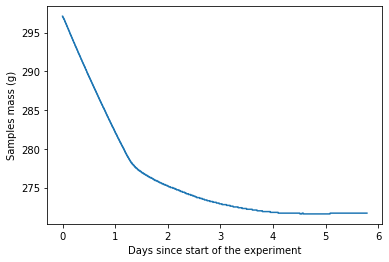

In [132]:
# Inspect data
plt.figure()
plt.plot(df["elapsed_time"], df["sample_mass"])
plt.xlabel("Days since start of the experiment")
plt.ylabel("Samples mass (g)")
plt.show()


In [133]:
# Smooth samples mass data
df["smoothed_sample_mass"] = df["sample_mass"].rolling(window=15).mean()


In [134]:
# Compute evaporation rate
E_rate = np.diff(df["smoothed_sample_mass"].iloc[0::20]) / np.diff(df["elapsed_time"].iloc[0::20])
E_rate = E_rate * -1


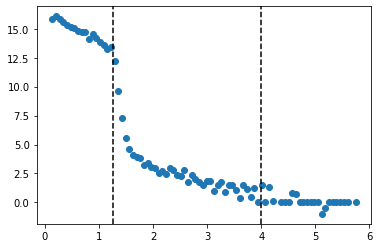

In [135]:
plt.figure()
plt.scatter(df["elapsed_time"].iloc[20::20], E_rate)
plt.axvline(1.25, linestyle='--', color='k')
plt.axvline(4,linestyle='--', color='k')
plt.show()